In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import openpyxl

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
path = os.chdir(r"/Users/cts08/Desktop")
os.listdir()
#데이터 불러오기
df1 = pd.read_csv("data_038_1.csv", header = 0 )
df2 = pd.read_excel("schema.xlsx")
df1.head()
temp_dat = df1.copy()
temp_dat.head(5)

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,B165,B166,B167,C1,E1,E2,E3,E4,E5,E6
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4350000,210,0.0,0.000000e+00,1.111111e+10,0,1.111110e+11,1.100000e+09
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,580000,40,0.0,0.000000e+00,0.000000e+00,0,1.111100e+11,1.000000e+10
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,0,1950000,50,0.0,1.101101e+09,0.000000e+00,0,1.111010e+11,1.011010e+11
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,43000000,50,0.0,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,4910000,40,0.0,1.111110e+11,0.000000e+00,0,1.111110e+11,1.111110e+11


In [3]:
temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['농업']=0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0
temp_dat['전자기기'] = 0
temp_dat['장비 및 화물운송'] = 0
temp_dat['생활서비스'] = 0
temp_dat['전문서비스'] = 0
temp_dat['제조업']=0
temp_dat['교통수단_관리'] = 0



for i in range(1, 167):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif(i == 28):
        temp_dat['농업'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    elif(i == 33):
        temp_dat['전자기기'] += temp_dat[f"B{i}"]
    elif(i >= 124 and i <= 126):
        temp_dat['장비 및 화물운송'] += temp_dat[f"B{i}"]
    elif((i >= 127 and i <= 128) or (i == 133) or (i >= 135 and i <= 136)):
        temp_dat['생활서비스'] += temp_dat[f"B{i}"]
    elif(i >= 128 and i <= 132):
        temp_dat['전문서비스'] += temp_dat[f"B{i}"]
    elif(i >= 150 and i <= 151):
        temp_dat['제조업'] += temp_dat[f"B{i}"]
    elif((i == 119) or (i >= 158 and i <= 159) or (i >= 165 and i <= 166)):
        temp_dat['교통수단_관리'] += temp_dat[f"B{i}"]
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]

In [4]:
# 패턴코드 사용횟수 추출

ori_dat = temp_dat.iloc[:,:-20]
def solution(n):
    N = [int(i) for i in str(n)]
    return sum(N)

In [5]:
ori_dat["E1 사용횟수"] = ori_dat["E1"].apply(lambda x: solution(int(x)))
ori_dat["E2 사용횟수"] = ori_dat["E2"].apply(lambda x: solution(int(x)))
ori_dat["E3 사용횟수"] = ori_dat["E3"].apply(lambda x: solution(int(x)))
ori_dat["E4 사용횟수"] = ori_dat["E4"].apply(lambda x: solution(int(x)))
ori_dat["E5 사용횟수"] = ori_dat["E5"].apply(lambda x: solution(int(x)))
ori_dat["E6 사용횟수"] = ori_dat["E6"].apply(lambda x: solution(int(x)))
ori_dat # 각 패턴코드 사용횟수의 총합에 대한 새로운 컬럼 추가

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,E3,E4,E5,E6,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,1.111111e+10,0,1.111110e+11,1.100000e+09,0,0,10,0,6,2
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111100e+11,1.000000e+10,0,0,0,0,5,1
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111010e+11,1.011010e+11,0,8,0,0,5,4
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,0,0,0,6,6
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,6,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.011111e+10,6,4,0,0,6,8
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,4,0,0,6,6
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,4,0,0,6,6
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.101010e+11,0,3,0,0,6,4


In [78]:
# 각 연령별 데이터 필터링
condition20 = (ori_dat.P2 == '20대_후') | (ori_dat.P2 =="20대_초") # 조건식 작성
condition3040 = (ori_dat.P2 == '30대_후') | (ori_dat.P2 =="30대_초") | (ori_dat.P2 == '40대_후') | (ori_dat.P2 =="40대_초")
condition5060 = (ori_dat.P2 == '50대_후') | (ori_dat.P2 =="50대_초") | (ori_dat.P2 == '60대_후') | (ori_dat.P2 =="60대_초")

dat20 = ori_dat[condition20]     # 20대 고객 데이터
dat3040 = ori_dat[condition3040] # 30,40대 고객 데이터
dat5060 = ori_dat[condition5060] # 50,60대 고객 데이터

In [98]:
# 20대 전처리

df2_p = dat20.iloc[:, :7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보
df2_b = dat20.iloc[:, 7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보
df2_c = dat20.iloc[:, 174]      # 이용건수
df2_e = dat20.iloc[:, 175:181]  # 패턴코드
df2_f = dat20.iloc[:, 181:]     # 패턴코드 횟수

d2 = df2_p.copy()

d2.P1 = [int(x=="M") for x in df2_p.P1]
x2 = pd.concat([df2_b[a], df2_c, df2_f], axis=1)

x2_data = pd.concat([df2_b[a], df2_c, df2_f], axis=1).to_numpy()
y2_data = df2_p.P3.to_numpy()
x2_train = torch.FloatTensor(x2_data)
y2_train = torch.FloatTensor(y2_data).unsqueeze(1)

x2_train.shape, y2_train.shape, x2_train.shape[0]
nn.Linear(x2_train.shape[1], 1)

Linear(in_features=58, out_features=1, bias=True)

In [99]:
# 30~40대 전처리

df34_p = dat3040.iloc[:, :7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보
df34_b = dat3040.iloc[:, 7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보
df34_c = dat3040.iloc[:, 174]      # 이용건수
df34_e = dat3040.iloc[:, 175:181]  # 패턴코드
df34_f = dat3040.iloc[:, 181:]     # 패턴코드 횟수

d34 = df34_p.copy()

d34.P1 = [int(x=="M") for x in df34_p.P1]
x34 = pd.concat([df34_b[a], df34_c, df34_f], axis=1)

x34_data = pd.concat([df34_b[a], df34_c, df34_f], axis=1).to_numpy()
y34_data = df34_p.P3.to_numpy()
x34_train = torch.FloatTensor(x34_data)
y34_train = torch.FloatTensor(y34_data).unsqueeze(1)

x34_train.shape, y34_train.shape, x34_train.shape[0]
nn.Linear(x34_train.shape[1], 1)

Linear(in_features=58, out_features=1, bias=True)

In [100]:
# 50~60대 전처리

df56_p = dat5060.iloc[:, :7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보
df56_b = dat5060.iloc[:, 7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보
df56_c = dat5060.iloc[:, 174]      # 이용건수
df56_e = dat5060.iloc[:, 175:181]  # 패턴코드
df56_f = dat5060.iloc[:, 181:]     # 패턴코드 횟수

d56 = df56_p.copy()

d56.P1 = [int(x=="M") for x in df56_p.P1]
x56 = pd.concat([df56_b[a], df56_c, df56_f], axis=1)

x56_data = pd.concat([df56_b[a], df56_c, df56_f], axis=1).to_numpy()
y56_data = df56_p.P3.to_numpy()
x56_train = torch.FloatTensor(x56_data)
y56_train = torch.FloatTensor(y56_data).unsqueeze(1)

x56_train.shape, y56_train.shape, x56_train.shape[0]
nn.Linear(x56_train.shape[1], 1)

Linear(in_features=58, out_features=1, bias=True)

In [91]:
'''
x_data = pd.concat([df_b[a], df_c, df_f], axis=1).to_numpy()
y_data = df_p.P3.to_numpy()
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data).unsqueeze(1)

x_train.shape, y_train.shape, x_train.shape[0]
nn.Linear(x_train.shape[1], 1)
'''

In [93]:
model = nn.Sequential(
    nn.Linear(x_train.shape[1], 1),
    nn.Sigmoid()         # 출력은 시그모이드 함수를 거친다
)

In [94]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 5번마다 로그 출력
    if epoch % 5 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/10 Cost: 36.667778 Accuracy 62.90%
Epoch    5/10 Cost: 23.689585 Accuracy 76.07%
Epoch   10/10 Cost: 23.687609 Accuracy 75.99%


In [95]:
# 회귀분석
from sklearn.linear_model import LogisticRegression


train_x = x.copy()
train_y = df_p.iloc[:, 2].copy()

In [96]:
model = LogisticRegression(max_iter=100000)
model.fit(train_x.to_numpy(), train_y)

LogisticRegression(max_iter=100000)

In [97]:
print(model.score(train_x.to_numpy(), train_y))

0.7607231404958678


In [22]:
train_x

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B165,B166,B167,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,0,0,0,0,190000,0,101000,0,54000,0,...,0,0,4350000,210,0,0,10,0,6,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,970000,30,0,4,0,0,3,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1530000,90,6,3,0,0,6,4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,2050000,20,0,4,0,0,5,5
17,0,0,0,0,0,0,0,0,0,0,...,0,0,1110000,110,0,3,0,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,0,0,0,0,25000,0,0,0,0,0,...,0,0,2390000,110,2,3,7,0,4,3
473204,0,0,0,0,0,0,0,0,0,0,...,0,0,2160000,60,0,0,0,0,0,0
473217,0,0,0,0,0,0,0,0,0,0,...,0,0,1030000,70,2,0,0,0,1,1
473222,0,0,0,0,0,0,0,0,0,0,...,0,0,1360000,50,0,1,0,0,6,5


In [103]:
# 각 연령대별 k-means 전 train_x 설정
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

train_x2 = x2.copy()
train_x34 = x34.copy()
train_x56 = x56.copy()

In [104]:
# 20대 k-means

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(train_x2)

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(data_scale)

# 각 클러스터를 Pattern 컬럼으로 추가
train_x2['Pattern'] = cluster
train_x2

,B2,B3,B8,B10,B11,B16,B17,B18,B20,B21,...,B163,B164,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,Pattern
0,0,0,0,0,341000,78000,267000,0,17000,0,...,0,0,210,0,0,10,0,6,2,4
5,0,0,0,0,0,0,5000,0,0,0,...,0,0,30,0,4,0,0,3,2,2
6,0,0,0,0,265000,0,249000,0,6000,0,...,0,0,90,6,3,0,0,6,4,3
9,0,0,0,0,0,0,0,0,0,0,...,0,0,20,0,4,0,0,5,5,1
17,0,0,0,0,4000,6000,201000,0,16000,0,...,0,0,110,0,3,0,0,6,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,0,0,0,0,0,0,78000,0,27000,0,...,0,0,110,2,3,7,0,4,3,1
473204,0,0,0,0,0,0,130000,0,0,0,...,0,0,60,0,0,0,0,0,0,2
473217,0,0,0,0,0,0,9000,0,31000,0,...,0,0,70,2,0,0,0,1,1,2
473222,0,0,0,0,0,5000,75000,0,0,0,...,0,0,50,0,1,0,0,6,5,4


In [105]:
# 30~40대 k-means

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(train_x34)

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(data_scale)

# 각 클러스터를 Pattern 컬럼으로 추가
train_x34['Pattern'] = cluster
train_x34

,B2,B3,B8,B10,B11,B16,B17,B18,B20,B21,...,B163,B164,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,Pattern
2,0,0,1000,0,0,0,71000,0,5000,0,...,0,19000,50,0,8,0,0,5,4,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,40,0,6,0,0,6,6,4
7,0,0,0,0,63000,0,13000,0,3000,0,...,0,0,20,0,4,0,0,7,3,2
8,0,0,0,0,0,0,35000,0,43000,0,...,0,27000,40,0,0,0,0,5,4,3
10,0,0,0,0,0,0,0,0,18000,0,...,0,0,40,0,1,0,0,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473218,0,0,0,0,0,0,53000,0,0,0,...,0,0,40,0,8,1,0,6,2,4
473219,0,0,0,0,0,0,21000,0,0,0,...,0,0,20,0,0,0,0,3,0,0
473220,0,0,0,0,0,0,35000,0,0,0,...,0,0,50,0,6,3,0,3,0,2
473223,0,0,0,0,0,0,0,0,3000,0,...,0,0,30,6,4,0,0,6,8,1


In [106]:
# 50~60대 k-means

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(train_x56)

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(data_scale)

# 각 클러스터를 Pattern 컬럼으로 추가
train_x56['Pattern'] = cluster
train_x56

,B2,B3,B8,B10,B11,B16,B17,B18,B20,B21,...,B163,B164,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,Pattern
1,0,0,0,0,0,0,158000,0,0,0,...,0,0,40,0,0,0,0,5,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,50,0,0,0,0,6,6,3
13,0,0,0,0,0,0,0,0,0,0,...,0,0,20,0,6,0,0,6,10,4
15,0,0,0,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,30,0,6,1,0,6,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473212,0,0,0,0,0,0,7000,0,0,0,...,0,0,20,0,0,0,0,6,6,3
473213,0,0,19000,0,0,0,146000,0,71000,0,...,0,0,80,0,0,0,0,1,1,0
473221,0,0,0,0,0,0,0,0,0,0,...,0,0,40,0,0,0,0,6,4,3
473226,0,0,0,0,0,0,0,0,0,0,...,0,14000,50,0,3,0,0,6,4,3


In [25]:
'''

# k-means
from sklearn.preprocessing import MinMaxScaler

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(train_x)

from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(data_scale)

# 각 클러스터를 Pattern 컬럼으로 추가
train_x['Pattern'] = cluster
train_x

'''

In [125]:
# 각 등급에 따른 연령대별 은행고객과 비고객의 항목별 금액차이

d20 = pd.concat([df2_p.iloc[:,:3],train_x2], axis = 1)
d34 = pd.concat([df34_p.iloc[:,:3],train_x34], axis = 1)
d56 = pd.concat([df56_p.iloc[:,:3],train_x56], axis = 1)
d34

,P1,P2,P3,B2,B3,B8,B10,B11,B16,B17,...,B163,B164,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,Pattern
2,M,40대_후,1,0,0,1000,0,0,0,71000,...,0,19000,50,0,8,0,0,5,4,4
4,M,30대_후,0,0,0,0,0,0,0,0,...,0,0,40,0,6,0,0,6,6,4
7,M,30대_초,0,0,0,0,0,63000,0,13000,...,0,0,20,0,4,0,0,7,3,2
8,M,30대_후,0,0,0,0,0,0,0,35000,...,0,27000,40,0,0,0,0,5,4,3
10,F,30대_후,0,0,0,0,0,0,0,0,...,0,0,40,0,1,0,0,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473218,M,40대_초,0,0,0,0,0,0,0,53000,...,0,0,40,0,8,1,0,6,2,4
473219,M,40대_초,0,0,0,0,0,0,0,21000,...,0,0,20,0,0,0,0,3,0,0
473220,M,40대_후,1,0,0,0,0,0,0,35000,...,0,0,50,0,6,3,0,3,0,2
473223,F,40대_초,0,0,0,0,0,0,0,0,...,0,0,30,6,4,0,0,6,8,1


In [136]:
# 20대

d20_1_1 = d20.loc[(d20["Pattern"] == 0) & (d20["P3"] == 1)].iloc[:,3:].mean().round()
d20_1_0 = d20.loc[(d20["Pattern"] == 0) & (d20["P3"] == 0)].iloc[:,3:].mean().round()

d20_2_1 = d20.loc[(d20["Pattern"] == 1) & (d20["P3"] == 1)].iloc[:,3:].mean().round()
d20_2_0 = d20.loc[(d20["Pattern"] == 1) & (d20["P3"] == 0)].iloc[:,3:].mean().round()

d20_3_1 = d20.loc[(d20["Pattern"] == 2) & (d20["P3"] == 1)].iloc[:,3:].mean().round()
d20_3_0 = d20.loc[(d20["Pattern"] == 2) & (d20["P3"] == 0)].iloc[:,3:].mean().round()

d20_4_1 = d20.loc[(d20["Pattern"] == 3) & (d20["P3"] == 1)].iloc[:,3:].mean().round()
d20_4_0 = d20.loc[(d20["Pattern"] == 3) & (d20["P3"] == 0)].iloc[:,3:].mean().round()

d20_5_1 = d20.loc[(d20["Pattern"] == 4) & (d20["P3"] == 1)].iloc[:,3:].mean().round()
d20_5_0 = d20.loc[(d20["Pattern"] == 4) & (d20["P3"] == 0)].iloc[:,3:].mean().round()

d20_1_minus = d20_1_1 - d20_1_0
d20_2_minus = d20_2_1 - d20_2_0
d20_3_minus = d20_3_1 - d20_3_0
d20_4_minus = d20_4_1 - d20_4_0
d20_5_minus = d20_5_1 - d20_5_0

In [137]:
# 30~40대

d34_1_1 = d34.loc[(d34["Pattern"] == 0) & (d34["P3"] == 1)].iloc[:,3:].mean().round()
d34_1_0 = d34.loc[(d34["Pattern"] == 0) & (d34["P3"] == 0)].iloc[:,3:].mean().round()

d34_2_1 = d34.loc[(d34["Pattern"] == 1) & (d34["P3"] == 1)].iloc[:,3:].mean().round()
d34_2_0 = d34.loc[(d34["Pattern"] == 1) & (d34["P3"] == 0)].iloc[:,3:].mean().round()

d34_3_1 = d34.loc[(d34["Pattern"] == 2) & (d34["P3"] == 1)].iloc[:,3:].mean().round()
d34_3_0 = d34.loc[(d34["Pattern"] == 2) & (d34["P3"] == 0)].iloc[:,3:].mean().round()

d34_4_1 = d34.loc[(d34["Pattern"] == 3) & (d34["P3"] == 1)].iloc[:,3:].mean().round()
d34_4_0 = d34.loc[(d34["Pattern"] == 3) & (d34["P3"] == 0)].iloc[:,3:].mean().round()

d34_5_1 = d34.loc[(d34["Pattern"] == 4) & (d34["P3"] == 1)].iloc[:,3:].mean().round()
d34_5_0 = d34.loc[(d34["Pattern"] == 4) & (d34["P3"] == 0)].iloc[:,3:].mean().round()

d34_1_minus = d34_1_1 - d34_1_0
d34_2_minus = d34_2_1 - d34_2_0
d34_3_minus = d34_3_1 - d34_3_0
d34_4_minus = d34_4_1 - d34_4_0
d34_5_minus = d34_5_1 - d34_5_0

In [138]:
# 50~60대

d56_1_1 = d56.loc[(d56["Pattern"] == 0) & (d56["P3"] == 1)].iloc[:,3:].mean().round()
d56_1_0 = d56.loc[(d56["Pattern"] == 0) & (d56["P3"] == 0)].iloc[:,3:].mean().round()

d56_2_1 = d56.loc[(d56["Pattern"] == 1) & (d56["P3"] == 1)].iloc[:,3:].mean().round()
d56_2_0 = d56.loc[(d56["Pattern"] == 1) & (d56["P3"] == 0)].iloc[:,3:].mean().round()

d56_3_1 = d56.loc[(d56["Pattern"] == 2) & (d56["P3"] == 1)].iloc[:,3:].mean().round()
d56_3_0 = d56.loc[(d56["Pattern"] == 2) & (d56["P3"] == 0)].iloc[:,3:].mean().round()

d56_4_1 = d56.loc[(d56["Pattern"] == 3) & (d56["P3"] == 1)].iloc[:,3:].mean().round()
d56_4_0 = d56.loc[(d56["Pattern"] == 3) & (d56["P3"] == 0)].iloc[:,3:].mean().round()

d56_5_1 = d56.loc[(d56["Pattern"] == 4) & (d56["P3"] == 1)].iloc[:,3:].mean().round()
d56_5_0 = d56.loc[(d56["Pattern"] == 4) & (d56["P3"] == 0)].iloc[:,3:].mean().round()

d56_1_minus = d56_1_1 - d56_1_0
d56_2_minus = d56_2_1 - d56_2_0
d56_3_minus = d56_3_1 - d56_3_0
d56_4_minus = d56_4_1 - d56_4_0
d56_5_minus = d56_5_1 - d56_5_0

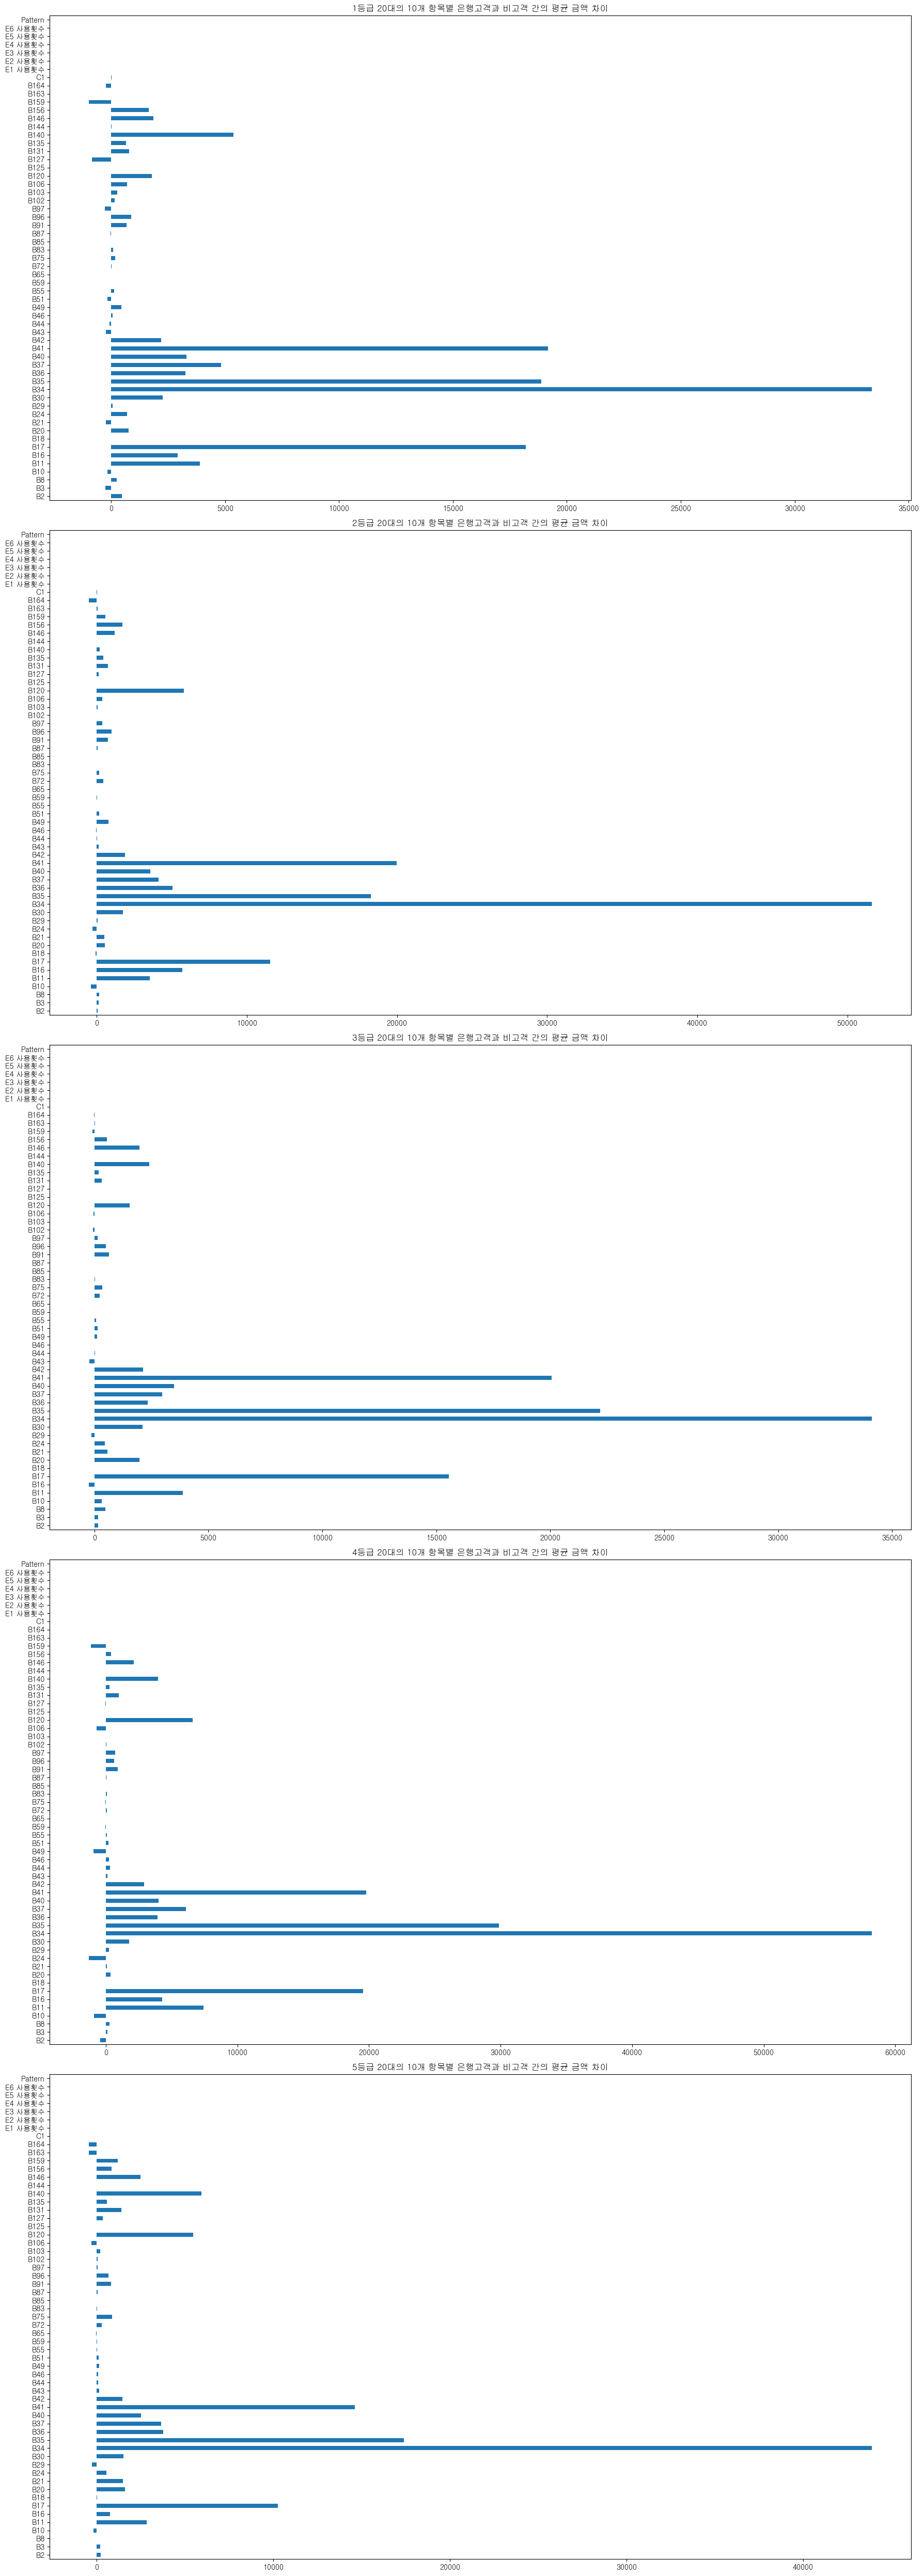

In [139]:
# 20대 그래프

plt.figure(figsize=(18,50))

plt.subplot(5,1,1)
plt.title("1등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d20_1_minus.plot.barh(d20_1_minus.index, d20_1_minus.values)

plt.subplot(5,1,2)
plt.title("2등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d20_2_minus.plot.barh(d20_2_minus.index, d20_2_minus.values)

plt.subplot(5,1,3)
plt.title("3등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d20_3_minus.plot.barh(d20_3_minus.index, d20_3_minus.values)

plt.subplot(5,1,4)
plt.title("4등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d20_4_minus.plot.barh(d20_4_minus.index, d20_4_minus.values)

plt.subplot(5,1,5)
plt.title("5등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d20_5_minus.plot.barh(d20_5_minus.index, d20_5_minus.values)

plt.tight_layout()
plt.show()

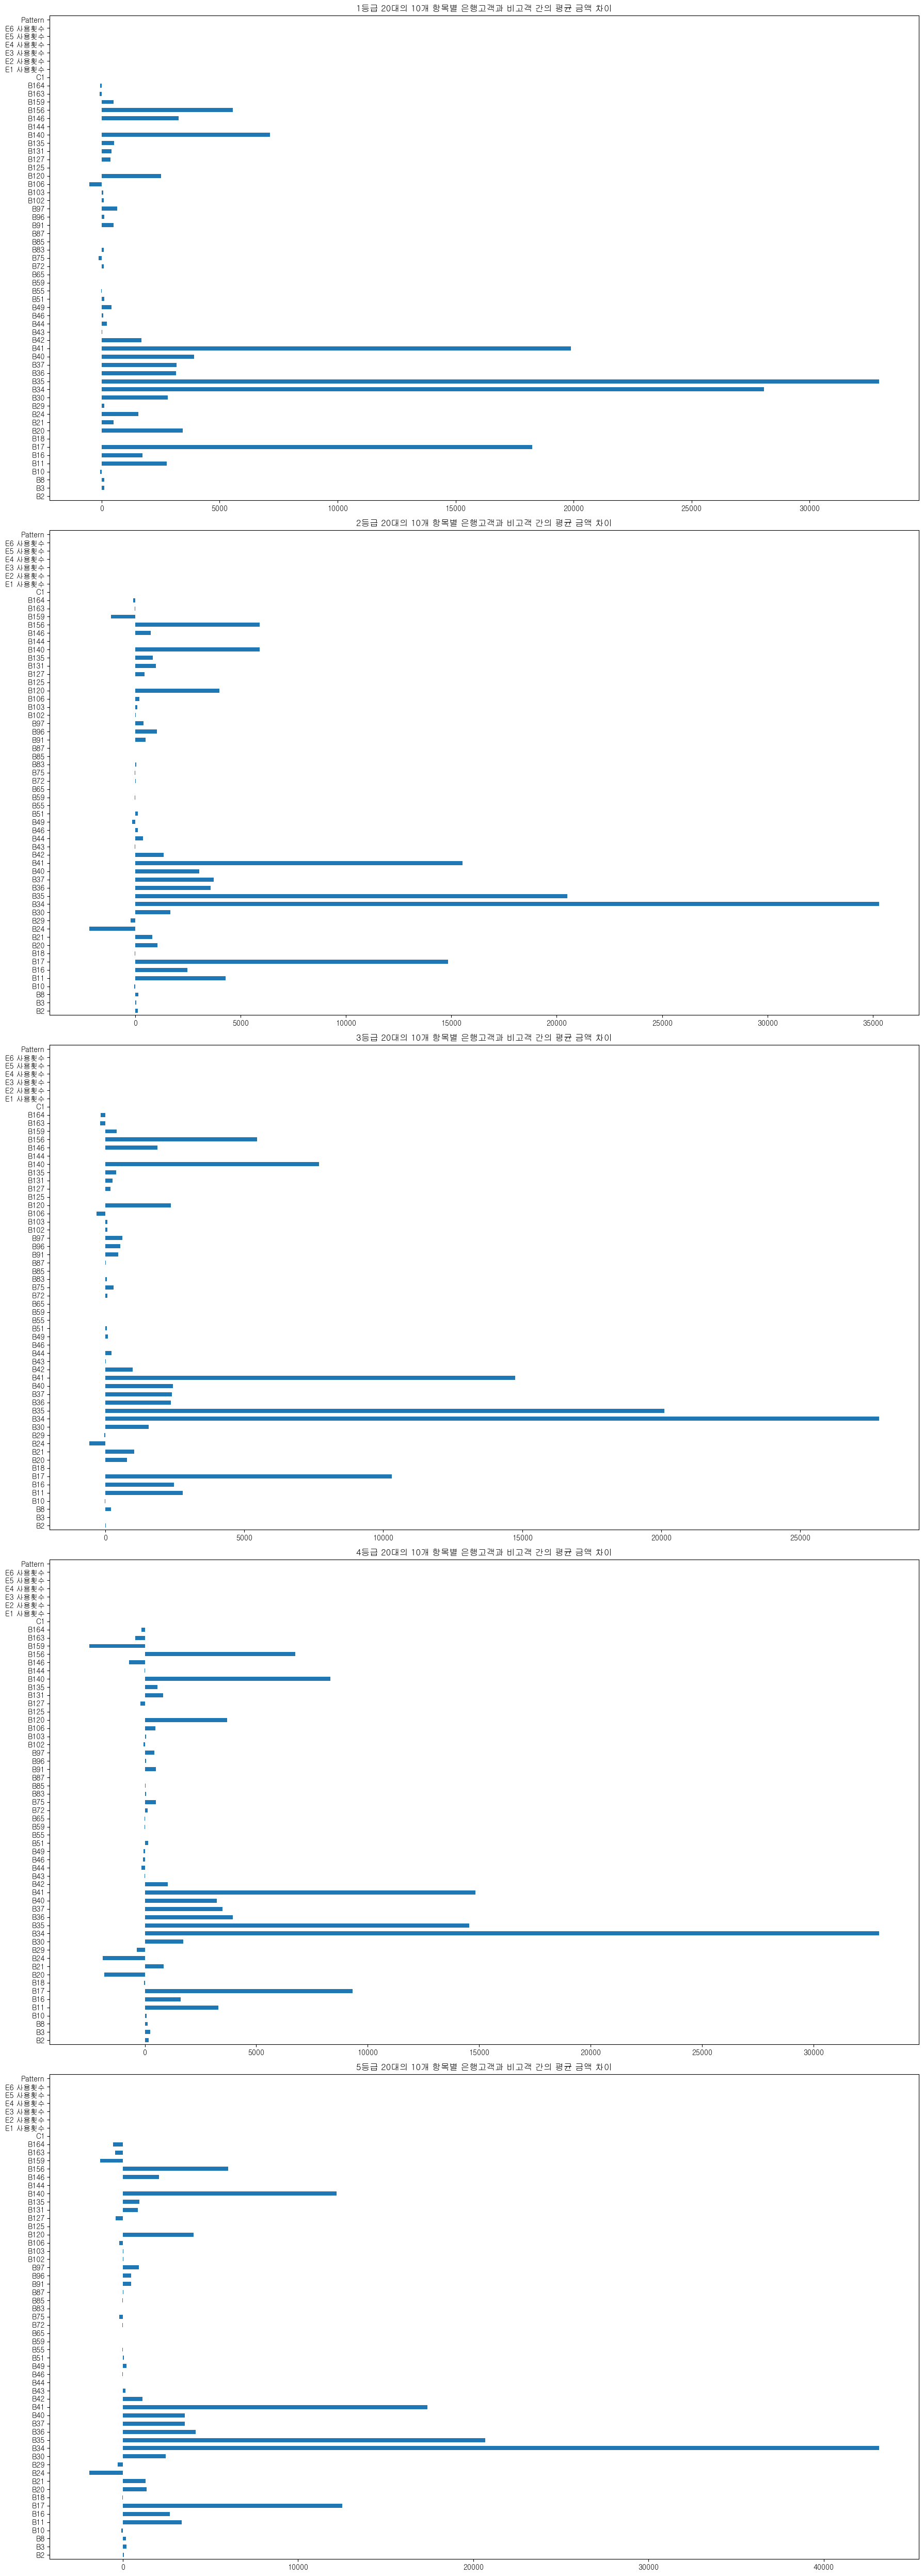

In [140]:
# 30~40대 그래프

plt.figure(figsize=(18,50))

plt.subplot(5,1,1)
plt.title("1등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d34_1_minus.plot.barh(d34_1_minus.index, d34_1_minus.values)

plt.subplot(5,1,2)
plt.title("2등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d34_2_minus.plot.barh(d34_2_minus.index, d34_2_minus.values)

plt.subplot(5,1,3)
plt.title("3등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d34_3_minus.plot.barh(d34_3_minus.index, d34_3_minus.values)

plt.subplot(5,1,4)
plt.title("4등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d34_4_minus.plot.barh(d34_4_minus.index, d34_4_minus.values)

plt.subplot(5,1,5)
plt.title("5등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d34_5_minus.plot.barh(d34_5_minus.index, d34_5_minus.values)

plt.tight_layout()
plt.show()

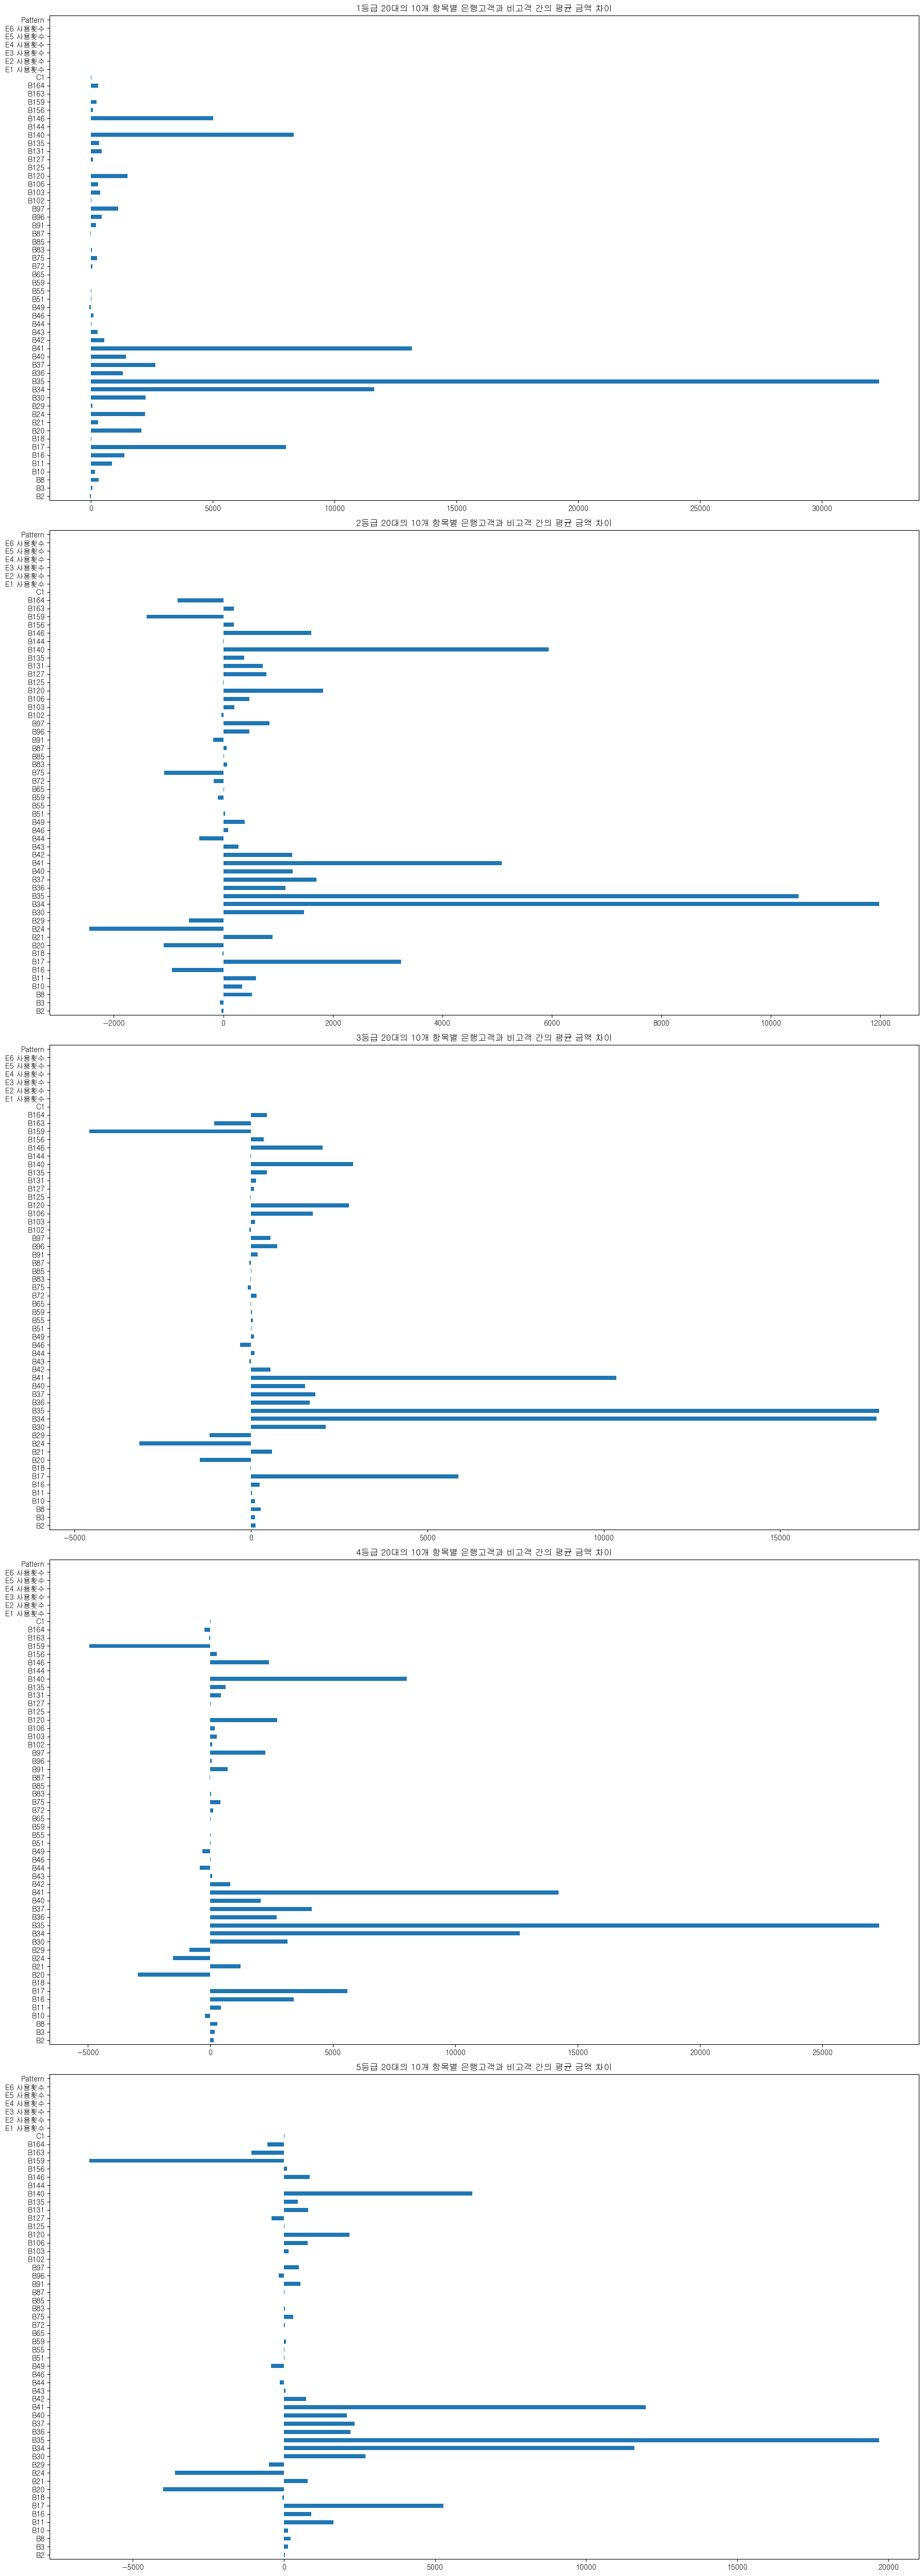

In [141]:
# 50~60대 그래프

plt.figure(figsize=(18,50))

plt.subplot(5,1,1)
plt.title("1등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d56_1_minus.plot.barh(d56_1_minus.index, d56_1_minus.values)

plt.subplot(5,1,2)
plt.title("2등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d56_2_minus.plot.barh(d56_2_minus.index, d56_2_minus.values)

plt.subplot(5,1,3)
plt.title("3등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d56_3_minus.plot.barh(d56_3_minus.index, d56_3_minus.values)

plt.subplot(5,1,4)
plt.title("4등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d56_4_minus.plot.barh(d56_4_minus.index, d56_4_minus.values)

plt.subplot(5,1,5)
plt.title("5등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
d56_5_minus.plot.barh(d56_5_minus.index, d56_5_minus.values)

plt.tight_layout()
plt.show()

In [ ]:
# 임의의 상관계수가 높은 탑10 항목 조사
# [34, 35, 62, 107, 109, 150, 162, 165, 168, 169]

In [291]:
x2 = x1[["Pattern","B33","B34","B61","B106","B108","B149","B161","B164","B167","C1"]]
x2
# "전자상거래_다품목취급","결제대행_PG","통신요금_이동시내전화","생명보험","일반전문학원","제약회사","주유소","가정용연료","총액","이용건수"

,Pattern,B33,B34,B61,B106,B108,B149,B161,B164,B167,C1
0,0,135000,764000,283000,0,0,0,70000,0,4350000,210
5,1,228000,224000,52000,0,0,0,170000,0,970000,30
6,4,38000,224000,0,0,0,0,0,0,1530000,90
9,2,0,0,174000,0,0,0,0,0,2050000,20
17,0,0,36000,0,0,0,0,50000,0,1110000,110
...,...,...,...,...,...,...,...,...,...,...,...
473200,2,237000,326000,129000,0,0,0,150000,0,2390000,110
473204,1,60000,1136000,24000,0,0,0,0,0,2160000,60
473217,1,19000,52000,0,0,0,0,170000,0,1030000,70
473222,0,0,24000,0,0,0,0,200000,0,1360000,50


In [292]:
df1 = pd.concat([df_p.iloc[:,:3],x2], axis = 1)
df1

,P1,P2,P3,Pattern,B33,B34,B61,B106,B108,B149,B161,B164,B167,C1
0,M,20대_후,1,0,135000,764000,283000,0,0,0,70000,0,4350000,210
5,M,20대_후,0,1,228000,224000,52000,0,0,0,170000,0,970000,30
6,M,20대_후,0,4,38000,224000,0,0,0,0,0,0,1530000,90
9,F,20대_후,0,2,0,0,174000,0,0,0,0,0,2050000,20
17,M,20대_후,1,0,0,36000,0,0,0,0,50000,0,1110000,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,M,20대_후,1,2,237000,326000,129000,0,0,0,150000,0,2390000,110
473204,M,20대_후,1,1,60000,1136000,24000,0,0,0,0,0,2160000,60
473217,M,20대_후,1,1,19000,52000,0,0,0,0,170000,0,1030000,70
473222,M,20대_후,1,0,0,24000,0,0,0,0,200000,0,1360000,50


In [295]:
df0_1 = df1.loc[(df1["Pattern"] == 0) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df0_0 = df1.loc[(df1["Pattern"] == 0) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df1_1 = df1.loc[(df1["Pattern"] == 1) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df1_0 = df1.loc[(df1["Pattern"] == 1) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df2_1 = df1.loc[(df1["Pattern"] == 2) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df2_0 = df1.loc[(df1["Pattern"] == 2) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df3_1 = df1.loc[(df1["Pattern"] == 3) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df3_0 = df1.loc[(df1["Pattern"] == 3) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df4_1 = df1.loc[(df1["Pattern"] == 4) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df4_0 = df1.loc[(df1["Pattern"] == 4) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df0_minus = df0_1 - df0_0
df1_minus = df1_1 - df1_0
df2_minus = df2_1 - df2_0
df3_minus = df3_1 - df3_0
df4_minus = df4_1 - df4_0

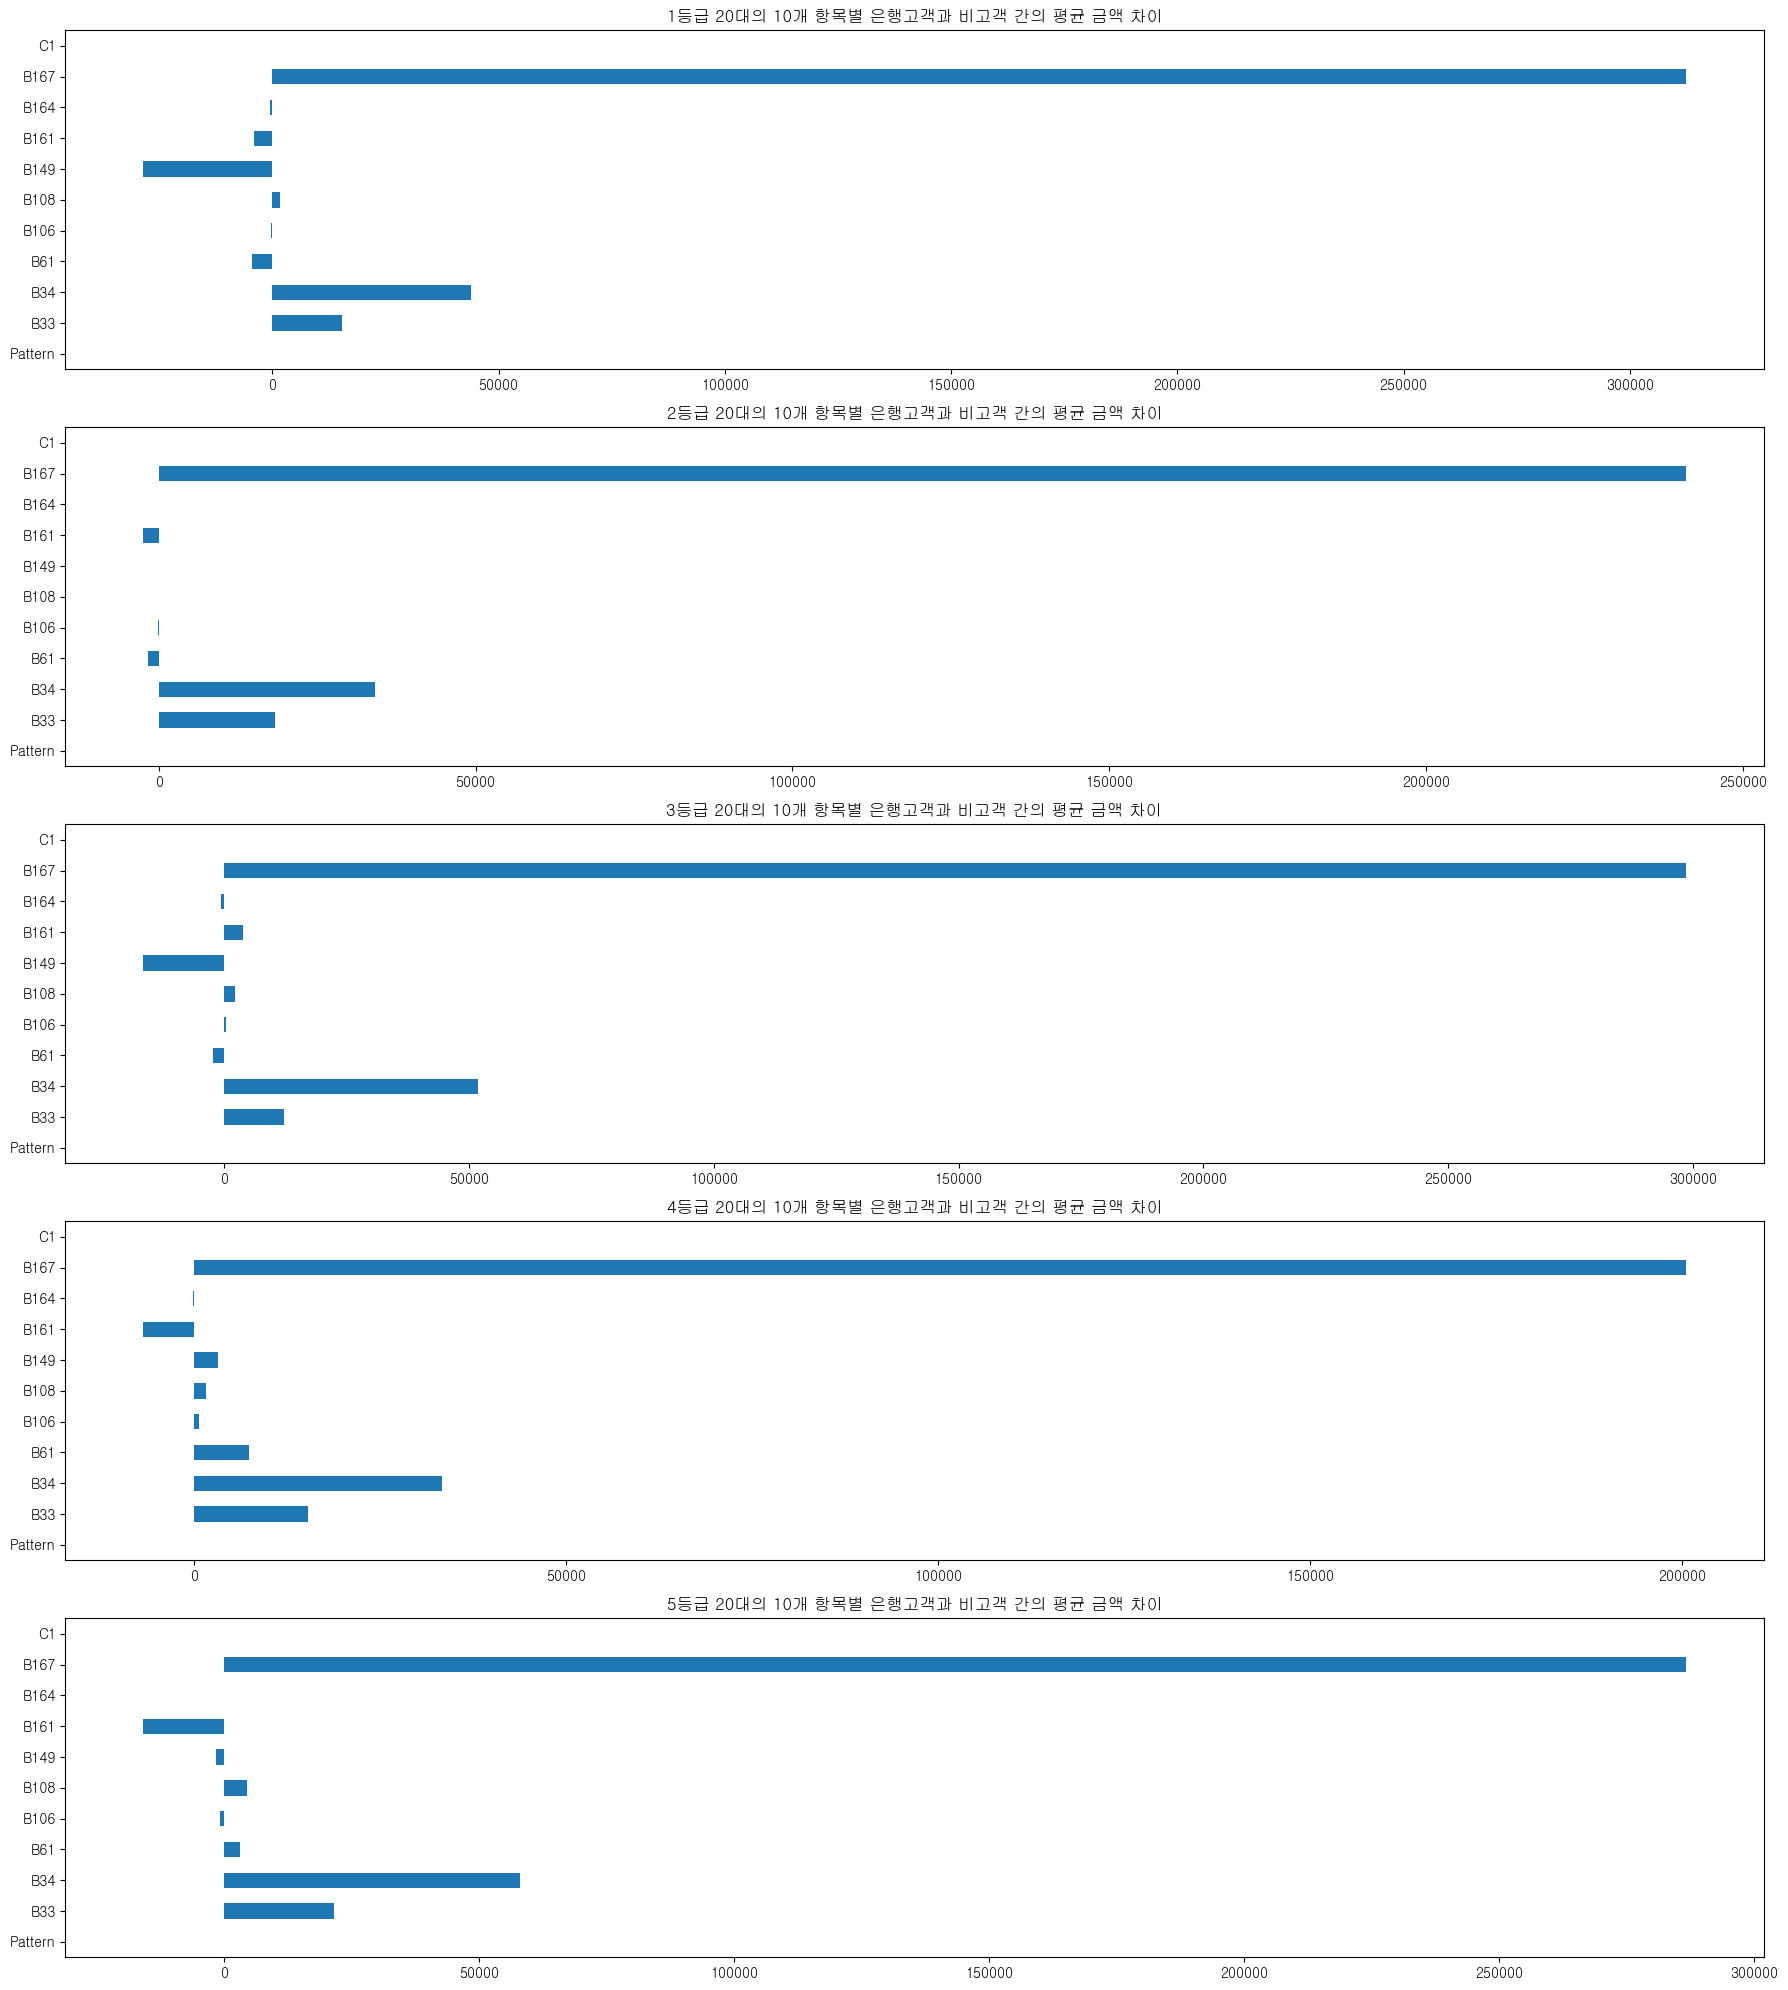

In [307]:
plt.figure(figsize=(18,20))

plt.subplot(5,1,1)
plt.title("1등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df0_minus.plot.barh(df0_minus.index, df0_minus.values)

plt.subplot(5,1,2)
plt.title("2등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df1_minus.plot.barh(df1_minus.index, df1_minus.values)

plt.subplot(5,1,3)
plt.title("3등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df2_minus.plot.barh(df2_minus.index, df2_minus.values)

plt.subplot(5,1,4)
plt.title("4등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df3_minus.plot.barh(df3_minus.index, df3_minus.values)

plt.subplot(5,1,5)
plt.title("5등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df4_minus.plot.barh(df4_minus.index, df4_minus.values)

plt.tight_layout()
plt.show()

In [ ]:
# 변수선택 후의 회귀분석과 군집화

In [ ]:
'''
금액_1급호텔 + 금액_2급호텔 + 금액_고속버스 + 금액_여객선 + 금액_택시 + 
    금액_쇼핑몰 + 금액_편의점 + 금액_대량양판점 + 
    금액_식품잡화 + 금액_면세점 + 금액_농협마트 + 
    금액_농협기타 + 금액_제과점 + 금액_결제대행_PG + 
    금액_한식 + 금액_양식 + 금액_일식 + 금액_커피전문점 + 
    금액_일반대중음식 + 금액_패스트푸드 + 금액_수예_지물_커텐_카페트 + 
    금액_조명및전기자재실내장식 + 금액_페인트 + 
    금액_주방기구및용품_정수기 + 금액_자동판매기 + 
    금액_사무기기 + 금액_과학기자재 + 금액_양품점 + 
    금액_가방_핸드백_가죽 + 금액_귀금속_금_은_보석 + 
    금액_수족관 + 금액_동물농장 + 금액_악기 + 
    금액_서적 + 금액_화장품 + 금액_실내골프장 + 
    금액_수영장 + 금액_당구장 + 금액_생명보험 + 
    금액_스포츠센타_레포츠클럽 + 금액_보관_창고업 + 
    금액_각종수리점 + 금액_용역서비스_연구_번역등 + 
    금액_주차장 + 금액_개인병원 + 금액_보건소 + 
    금액_약국 + 금액_유치원 + 금액_차량용품_부품 + 
    금액_유류도매 + 금액_가정용연료"
    '''

In [32]:
a = ["B2","B3","B8","B10","B11","B16","B17","B18","B20","B21","B24","B29","B30","B34","B35","B36","B37","B40","B41","B42","B43","B44","B46","B49","B51","B55","B59","B65","B72","B75","B83","B85","B87","B91","B96","B97","B102","B103","B106","B120","B125","B127","B131","B135","B140","B144","B146","B156","B159","B163","B164"]

In [9]:
# 은행 고객과 비 고객을 나눈 데이터

p_dat = temp_dat.loc[temp_dat["P3"] == 1]
np_dat = temp_dat.loc[temp_dat["P3"] == 0]
# 마찬가지로 고객과 비고객별 성별, 연령, 성별 및 연령의 데이터 그래프 추세 파악 가능(코드는 아래랑 동일하게 짜면 될듯)

In [10]:
# 전체 데이터 중 성별 및 연령별 그룹된 항목만 추출한 데이터

a_dat = temp_dat.groupby(['P1','P2']).mean().iloc[:,-20:]
a_mean = a_dat.round(decimals=0)
a_mean

# 전체 데이터 중 성별을 먼저 나눈 후 각 성별에서의 연령별 그룹된 항목만 추출한 데이터

female_dat = temp_dat.groupby("P1").get_group("F")
f_age = female_dat.groupby(['P1','P2']).mean().iloc[:,-20:]
male_dat = temp_dat.groupby("P1").get_group("M")
m_age = male_dat.groupby(['P1','P2']).mean().iloc[:,-20:]

# 전체 데이터 중 연령을 먼저 나눈 후 각 연령에서의 그룹된 항목만 추출한 데이터
age_2a = temp_dat.groupby("P2").get_group("20대_초").iloc[:,-20:].mean()
age_2b = temp_dat.groupby("P2").get_group("20대_후").iloc[:,-20:].mean()
age_3a = temp_dat.groupby("P2").get_group("30대_초").iloc[:,-20:].mean()
age_3b = temp_dat.groupby("P2").get_group("30대_후").iloc[:,-20:].mean()
age_4a = temp_dat.groupby("P2").get_group("40대_초").iloc[:,-20:].mean()
age_4b = temp_dat.groupby("P2").get_group("40대_후").iloc[:,-20:].mean()
age_5a = temp_dat.groupby("P2").get_group("50대_초").iloc[:,-20:].mean()
age_5b = temp_dat.groupby("P2").get_group("50대_후").iloc[:,-20:].mean()
age_6a = temp_dat.groupby("P2").get_group("60대_초").iloc[:,-20:].mean()
age_6b = temp_dat.groupby("P2").get_group("60대_후").iloc[:,-20:].mean()

In [22]:
# 20대, 30~40대, 50~60대 연령대 별 그룹화 항목에 따른 평균값

age_2a = temp_dat.groupby("P2").get_group("20대_초").iloc[:,-20:]
age_2b = temp_dat.groupby("P2").get_group("20대_후").iloc[:,-20:]
age_2 = pd.concat([age_2a,age_2b], axis = 0)
age_2 = age_2.mean()
age_3a = temp_dat.groupby("P2").get_group("30대_초").iloc[:,-20:]
age_3b = temp_dat.groupby("P2").get_group("30대_후").iloc[:,-20:]
age_4a = temp_dat.groupby("P2").get_group("40대_초").iloc[:,-20:]
age_4b = temp_dat.groupby("P2").get_group("40대_후").iloc[:,-20:]
age_34 = pd.concat([age_3a,age_3b,age_4a,age_4b], axis = 0)
age_34 = age_34.mean()
age_5a = temp_dat.groupby("P2").get_group("50대_초").iloc[:,-20:]
age_5b = temp_dat.groupby("P2").get_group("50대_후").iloc[:,-20:]
age_6a = temp_dat.groupby("P2").get_group("60대_초").iloc[:,-20:]
age_6b = temp_dat.groupby("P2").get_group("60대_후").iloc[:,-20:]
age_56 = pd.concat([age_5a,age_5b,age_6a,age_6b], axis = 0)
age_56 = age_56.mean()

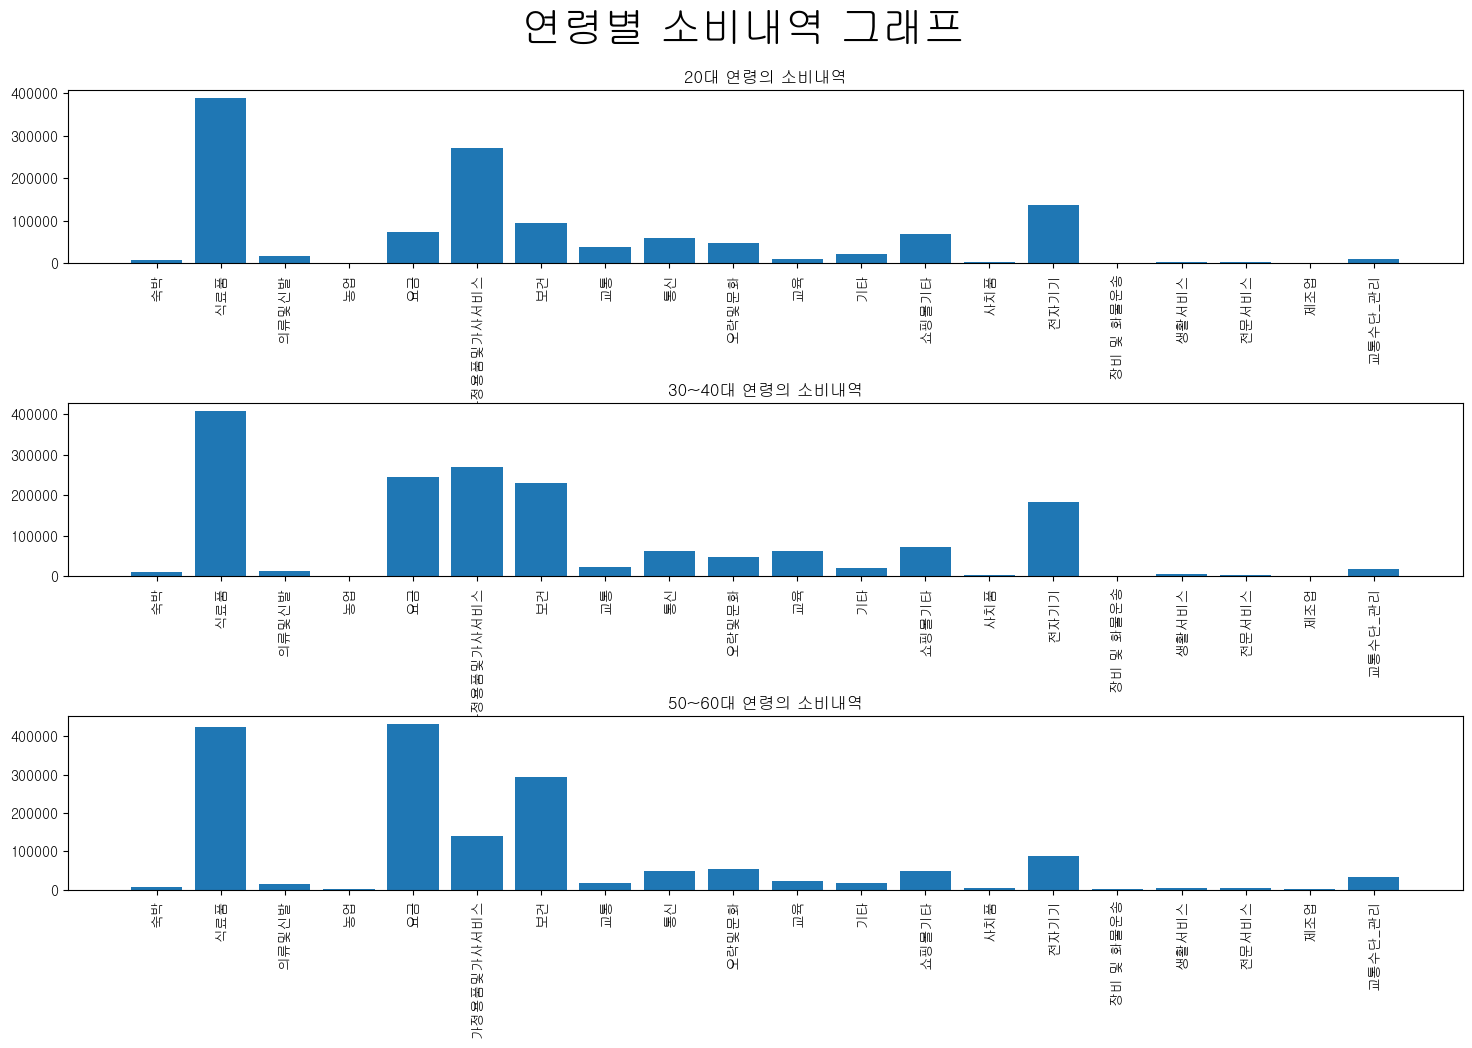

In [24]:
plt.figure(figsize = (18,10))

plt.subplot(3,1,1)
plt.title("20대 연령의 소비내역")
plt.bar(x = age_2.index, height = age_2)
plt.xticks(rotation = 90)

plt.subplot(3,1,2)
plt.title("30~40대 연령의 소비내역")
plt.bar(x = age_34.index, height = age_34)
plt.xticks(rotation = 90)

plt.subplot(3,1,3)
plt.title("50~60대 연령의 소비내역")
plt.bar(x = age_56.index, height = age_56)
plt.xticks(rotation = 90)

plt.suptitle("연령별 소비내역 그래프", fontsize = 30)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.80)
plt.show()

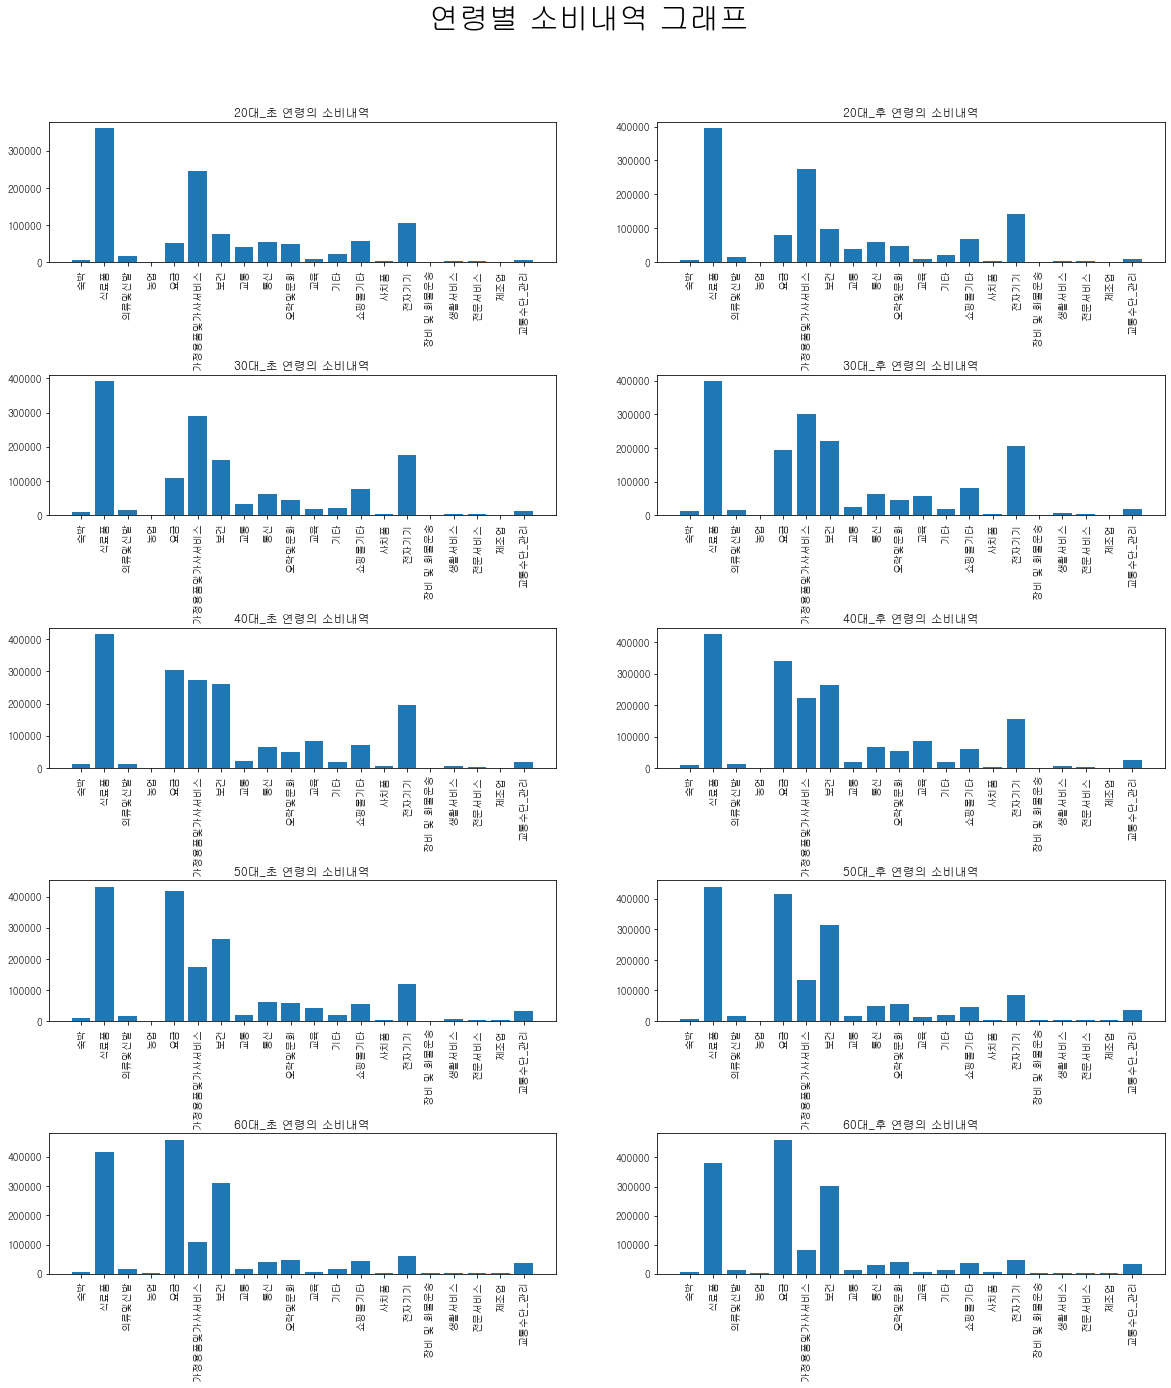

In [11]:
plt.figure(figsize=(20,20))


plt.subplot(5,2,1)
plt.title("20대_초 연령의 소비내역")
plt.bar(x = age_2a.index, height = age_2a)
plt.xticks(rotation = 90)

plt.subplot(5,2,2)
plt.title("20대_후 연령의 소비내역")
plt.bar(x = age_2b.index, height = age_2b)
plt.xticks(rotation = 90)

plt.subplot(5,2,3)
plt.title("30대_초 연령의 소비내역")
plt.bar(x = age_3a.index, height = age_3a)
plt.xticks(rotation = 90)

plt.subplot(5,2,4)
plt.title("30대_후 연령의 소비내역")
plt.bar(x = age_3b.index, height = age_3b)
plt.xticks(rotation = 90)

plt.subplot(5,2,5)
plt.title("40대_초 연령의 소비내역")
plt.bar(x = age_4a.index, height = age_4a)
plt.xticks(rotation = 90)

plt.subplot(5,2,6)
plt.title("40대_후 연령의 소비내역")
plt.bar(x = age_4b.index, height = age_4b)
plt.xticks(rotation = 90)

plt.subplot(5,2,7)
plt.title("50대_초 연령의 소비내역")
plt.bar(x = age_5a.index, height = age_5a)
plt.xticks(rotation = 90)

plt.subplot(5,2,8)
plt.title("50대_후 연령의 소비내역")
plt.bar(x = age_5b.index, height = age_5b)
plt.xticks(rotation = 90)

plt.subplot(5,2,9)
plt.title("60대_초 연령의 소비내역")
plt.bar(x = age_6a.index, height = age_6a)
plt.xticks(rotation = 90)

plt.subplot(5,2,10)
plt.title("60대_후 연령의 소비내역")
plt.bar(x = age_6b.index, height = age_6b)
plt.xticks(rotation = 90)

plt.suptitle("연령별 소비내역 그래프", fontsize = 30)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.80)
plt.show()

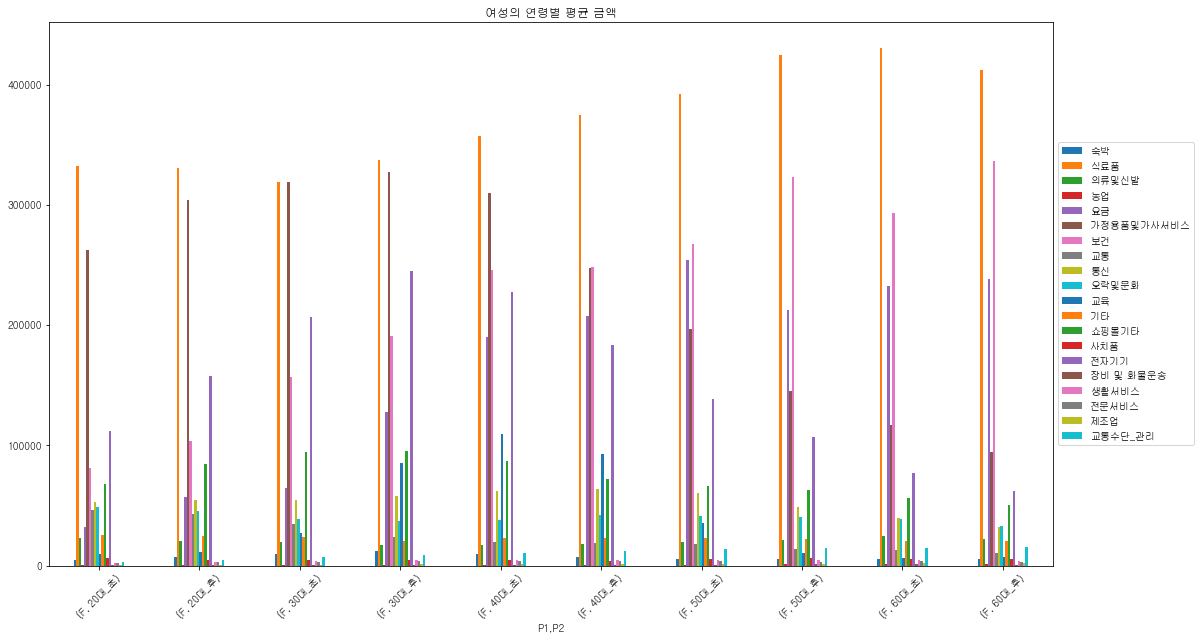

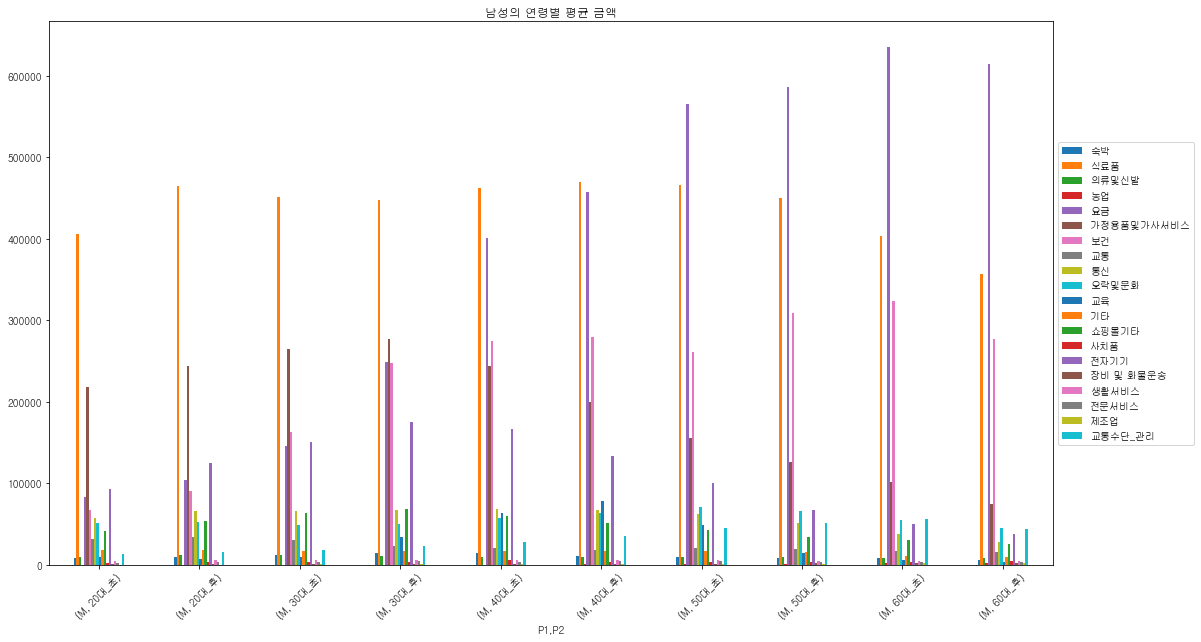

In [12]:
f_age.plot.bar(rot=0, figsize = (18,10))
plt.title("여성의 연령별 평균 금액")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

m_age.plot.bar(rot=0, figsize = (18,10))
plt.title("남성의 연령별 평균 금액")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.show()

In [13]:
# 은행과 증권사 별 데이터

temp_dat_A은행 = temp_dat.loc[temp_dat["P7"]  == "A은행"]
temp_dat_A증권사 = temp_dat.loc[temp_dat["P7"]  == "A증권사"]
temp_dat_B은행 = temp_dat.loc[temp_dat["P7"]  == "B은행"]
temp_dat_B증권사 = temp_dat.loc[temp_dat["P7"]  == "B증권사"]

temp_dat_A은행_p30 = temp_dat_A은행.loc[temp_dat["P3"]  == 1]
temp_dat_A증권사_p30 = temp_dat_A증권사.loc[temp_dat["P3"]  == 1]
temp_dat_B은행_p30 = temp_dat_B은행.loc[temp_dat["P3"]  == 1]
temp_dat_B증권사_p30 = temp_dat_B증권사.loc[temp_dat["P3"]  == 1]

temp_dat_A은행_p3x = temp_dat_A은행.loc[temp_dat["P3"]  == 0]
temp_dat_A증권사_p3x = temp_dat_A증권사.loc[temp_dat["P3"]  == 0]
temp_dat_B은행_p3x = temp_dat_B은행.loc[temp_dat["P3"]  == 0]
temp_dat_B증권사_p3x = temp_dat_B증권사.loc[temp_dat["P3"]  == 0]

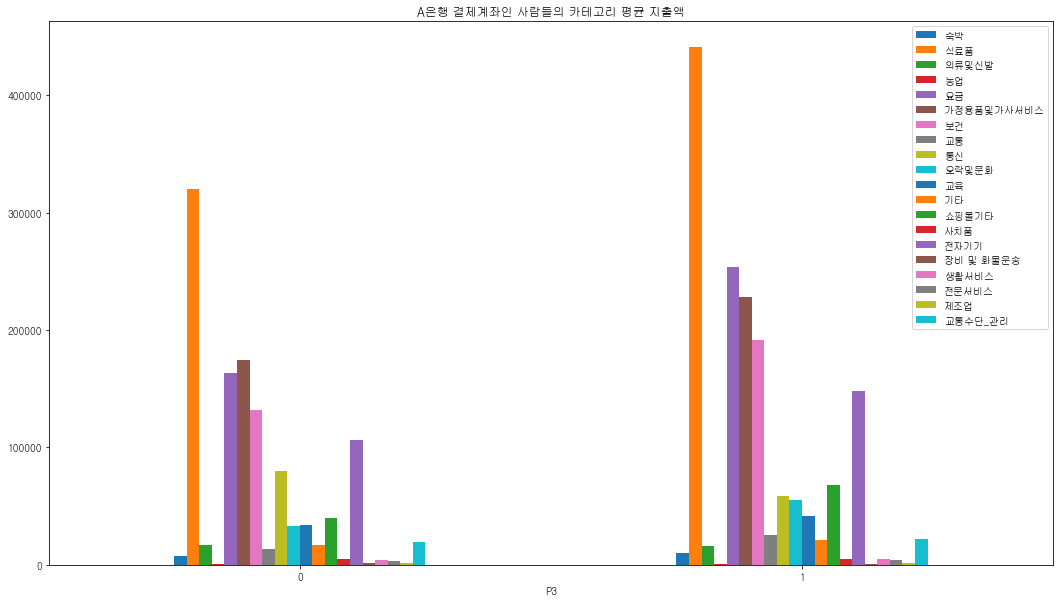

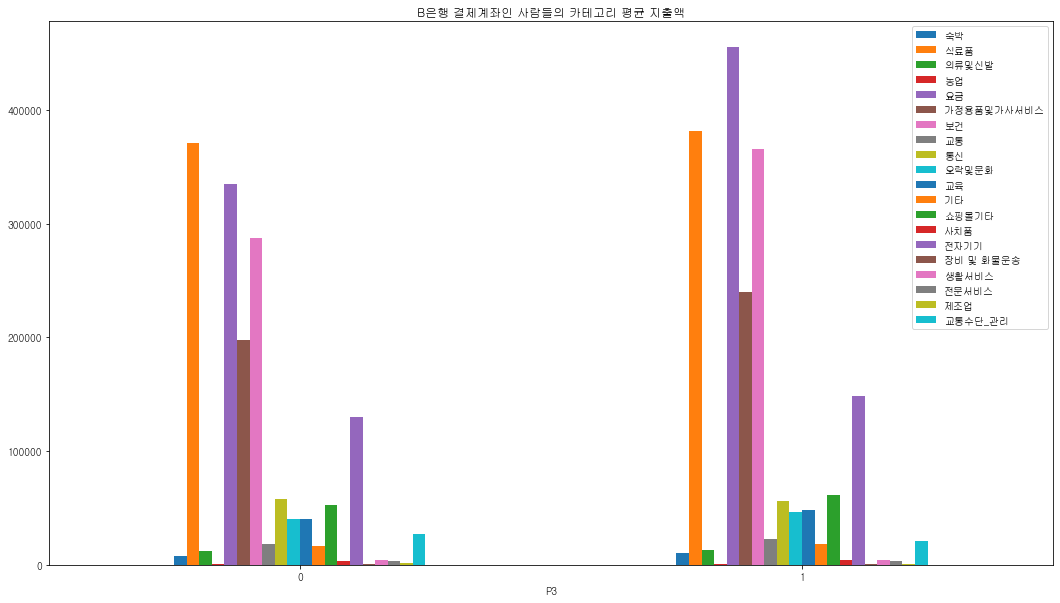

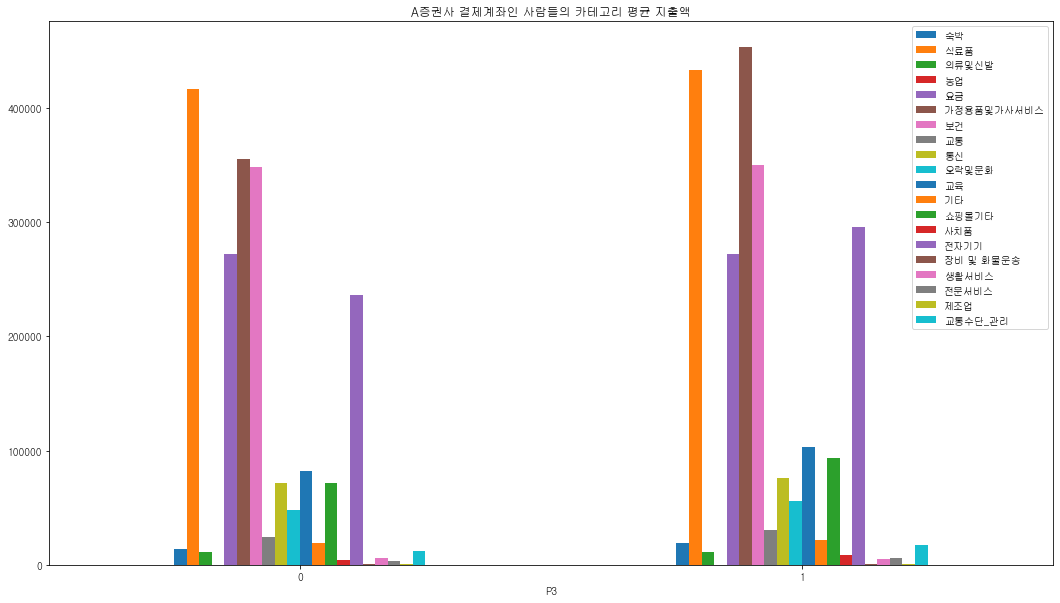

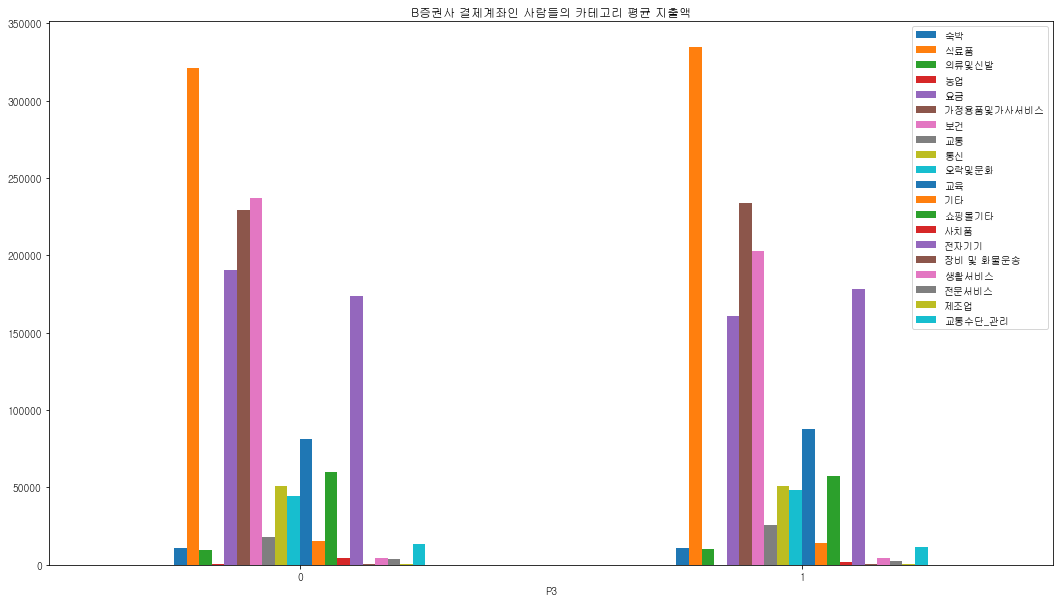

In [25]:
# 긱 은행과 증권사별 평균 지출액 비교 그래프

temp_groupby = temp_dat_A은행.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("A은행 결제계좌인 사람들의 카테고리 평균 지출액")

temp_groupby = temp_dat_B은행.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("B은행 결제계좌인 사람들의 카테고리 평균 지출액")

temp_groupby = temp_dat_A증권사.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("A증권사 결제계좌인 사람들의 카테고리 평균 지출액")

temp_groupby = temp_dat_B증권사.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("B증권사 결제계좌인 사람들의 카테고리 평균 지출액")

plt.show()